<a href="https://colab.research.google.com/github/qkasten/TF-clan/blob/main/exNB_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

In [ ]:
data = pd.read_csv('/content/exNB.csv',header=None)

In [ ]:
data.head()

,0,1,2
0,75.626754,181.704486,1.0
1,70.540408,176.177640,1.0
2,76.875023,178.667364,1.0
3,70.225610,157.504877,1.0
4,74.106298,168.525499,1.0


In [ ]:
X = data.to_numpy()

In [ ]:
X

array([[ 75.62675441, 181.70448626,   1.        ],
       [ 70.54040833, 176.17763989,   1.        ],
       [ 76.87502316, 178.66736388,   1.        ],
       ...,
       [ 65.34582701, 135.19952982,   0.        ],
       [ 59.38533074, 152.59859562,   0.        ],
       [ 68.708487  , 129.95783574,   0.        ]])

In [ ]:
X[:,-1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
y=X[:,-1]

In [ ]:
X=X[:,:-1]

In [ ]:
X

array([[ 75.62675441, 181.70448626],
       [ 70.54040833, 176.17763989],
       [ 76.87502316, 178.66736388],
       ...,
       [ 65.34582701, 135.19952982],
       [ 59.38533074, 152.59859562],
       [ 68.708487  , 129.95783574]])

In [ ]:
X[1]

array([ 70.54040833, 176.17763989])

In [ ]:
y.shape

(1000,)

In [ ]:
X.shape

(1000, 2)

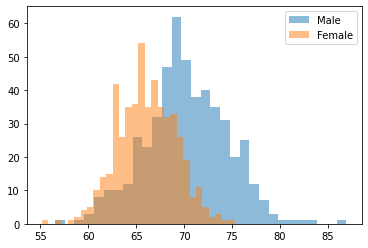

In [ ]:
plt.figure()
plt.hist(X[y==1,0], label="Male",alpha=0.5, bins=30)
plt.hist(X[y==0,0], label ="Female", alpha=0.5, bins=30)
plt.legend()

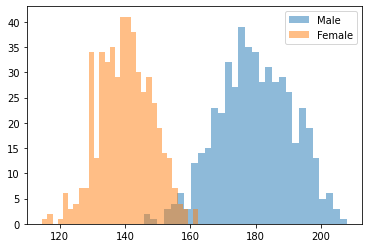

In [ ]:
plt.figure()
plt.hist(X[y==1,1], label="Male",alpha=0.5, bins=30)
plt.hist(X[y==0,1], label ="Female", alpha=0.5, bins=30)
plt.legend()

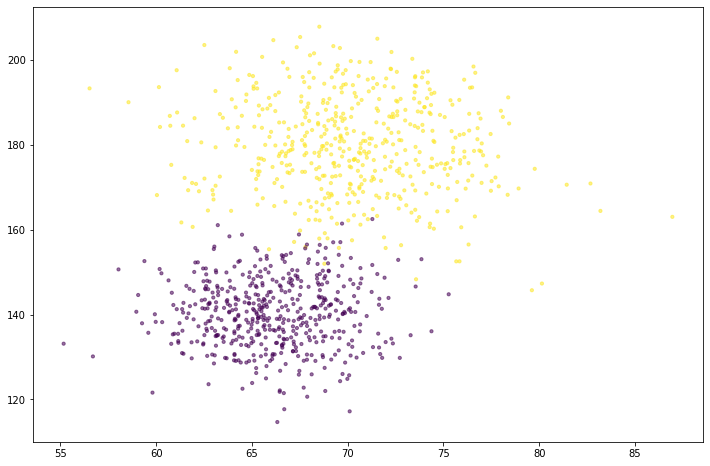

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1], c=y, alpha=0.55,s=10)

In [ ]:
class GaussNB():

  def fit(self,X,y, epsilon=1e-3):
    self.likelihoods = dict()
    self.priors = dict()

    self.K = set(y.astype(int))

    for k in self.K:

      X_k = X[y==k, : ]
      self.likelihoods[k]= {"mean": X_k.mean(axis=0), "cov": X_k.var(axis=0) +epsilon}
      self.priors[k] = len(X_k)/len(X)
  def predict(self, X):

    N, D = X.shape
    P_hat =np.zeros((N, len(self.K)))

    for k, l in self.likelihoods.items():
      P_hat[:, k] = mvn.logpdf(X, l["mean"], l['cov'])+ np.log(self.priors[k])

    return P_hat.argmax(axis=1)
  


In [ ]:
gnb=GaussNB()

In [ ]:
gnb.fit(X, y)

In [ ]:
y_hat = gnb.predict(X)

In [ ]:
def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [ ]:
accuracy(y, y_hat)

0.988

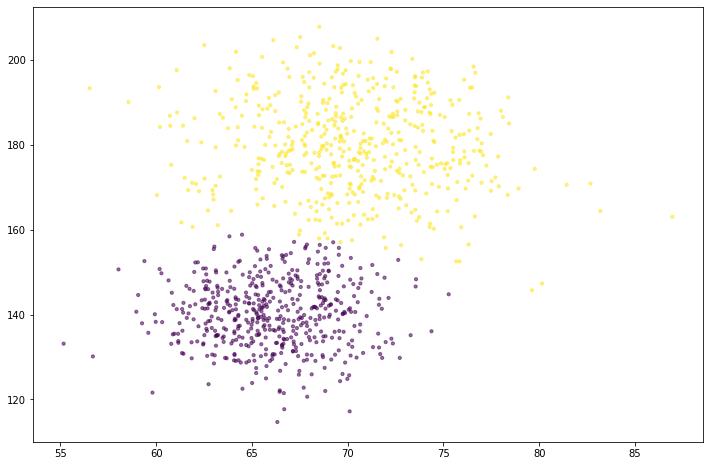

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1], c=y_hat, alpha=0.55,s=10)